# Employee Salary Prediction using Machine Learning
**Project:** Employee Salary Prediction

This notebook demonstrates step-by-step:
- Data loading & cleaning
- Feature preprocessing & encoding
- Model training & evaluation
- Feature importance visualization


# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load Dataset & Basic Info

In [3]:
df = pd.read_csv(r'C:\Users\amitl\Downloads\adult 3.csv')
print('✅ Dataset Loaded!')
print('Shape:', df.shape)
df.head()

✅ Dataset Loaded!
Shape: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Check Missing Values & Unique Categories

In [4]:
print('Missing values count:')
print(df.isnull().sum())
print('\nUnique values in workclass:')
print(df['workclass'].unique())

Missing values count:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Unique values in workclass:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


## Clean Data

In [5]:
df = df.replace(' ?', np.nan)
df = df.dropna()
print('✅ Missing values handled!')
print('New shape:', df.shape)

✅ Missing values handled!
New shape: (48842, 15)


## Separate Features & Target

In [6]:
X = df.drop('income', axis=1)
y = df['income']

## Encode Categorical Columns

In [7]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
y = LabelEncoder().fit_transform(y)
print('✅ Encoding Done!')
print('New feature shape:', X.shape)

✅ Encoding Done!
New feature shape: (48842, 100)


## Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (39073, 100)
Testing size: (9769, 100)


## Train RandomForest Model

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print('✅ Model training completed!')

✅ Model training completed!


## Evaluate the Model

In [11]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {acc*100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Model Accuracy: 85.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.73      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.86      9769



## Prediction

In [12]:
sample = X_test.iloc[0].values.reshape(1,-1)
pred = model.predict(sample)[0]
print('Sample Prediction:', 'Earns >50K' if pred==1 else 'Earns <=50K')

Sample Prediction: Earns <=50K


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Importance Visualization

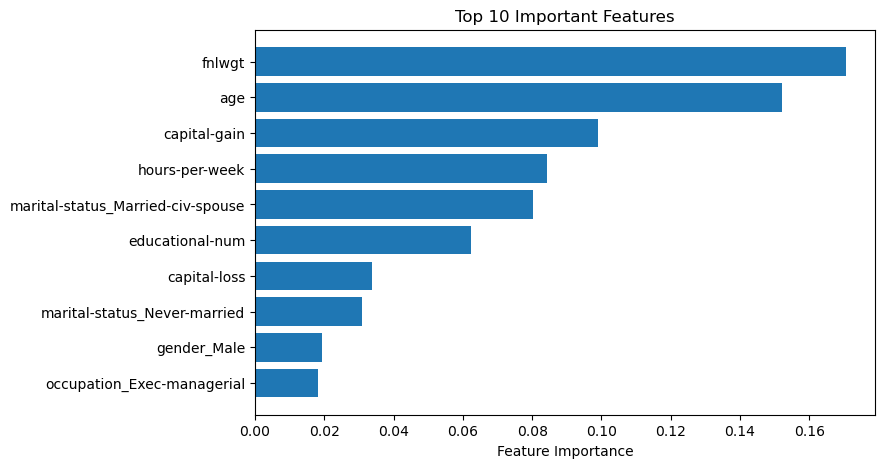

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()

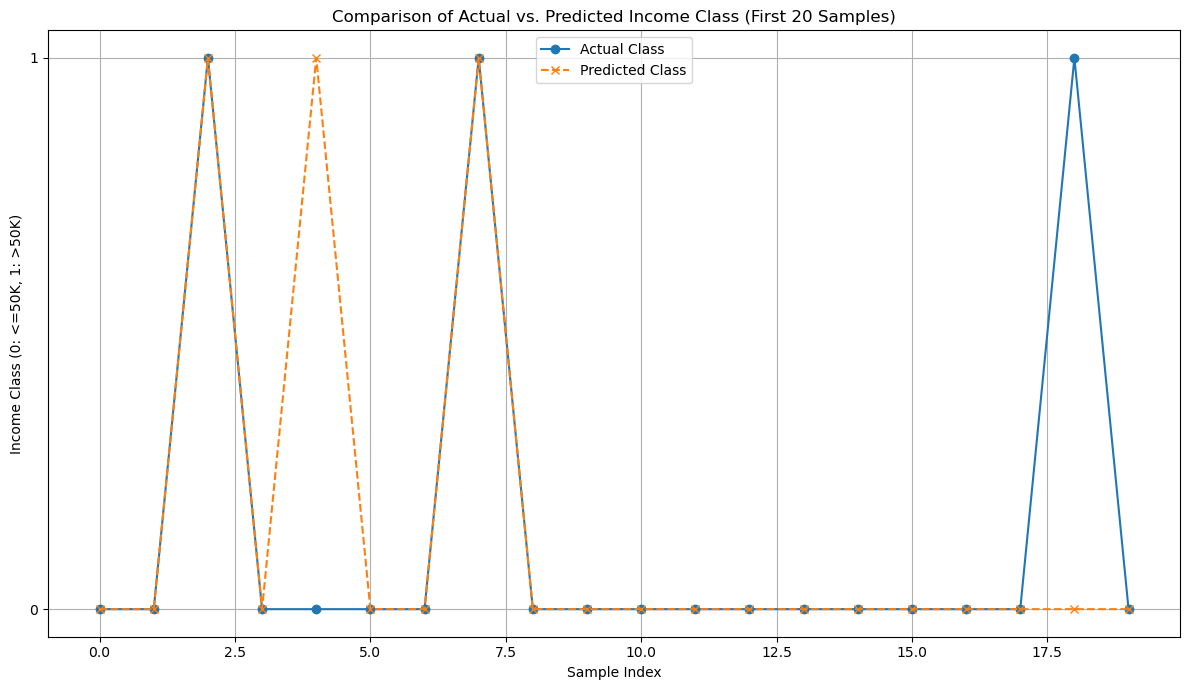

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for easy comparison.
# y_test and y_pred are already available from the previous cells.
comparison_df = pd.DataFrame({
    'Actual Class': y_test,
    'Predicted Class': y_pred
})

# Plot the first 20 samples for a clear visual comparison
plt.figure(figsize=(12, 7))
plt.plot(comparison_df['Actual Class'][:20], label="Actual Class", marker='o', linestyle='-')
plt.plot(comparison_df['Predicted Class'][:20], label="Predicted Class", marker='x', linestyle='--')

# --- Corrected Labels and Title ---
plt.title("Comparison of Actual vs. Predicted Income Class (First 20 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Income Class (0: <=50K, 1: >50K)")
plt.yticks([0, 1])  # Set y-axis ticks to only be 0 and 1 for clarity
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()